# 시각화 -- matplotlib

참고 사이트 :
1. 한국어로 된 가이드 책?
https://wikidocs.net/book/5011

2. matplotlib 사이트
https://matplotlib.org/

**■ matplotlib**
- 시각화 라이브러리 
- https://matplotlib.org/
- import matplotlib.pyplot as plt

## pie chart 
- 범주형 자료에 대한 그래프를 그릴때 사용
- 질적 자료(qualitative data, 정성적 자료)는 수치로 측정이 불가능한 자료이다. 
  분류 자료 또는 범주형 자료(categorical data)라고도 한다.
  예: 전화번호, 등번호, 성별, 혈액형, 계급, 순위, 등급, 종교 분류 등.
- 원을 그린 후 그 원에 각 계급의 상대도수에 대한 면적 또는 부분으로 나눈다 
- df
- 한글 폰트 불러오기

```
선호도     도수     상대도수     각도
-----------------------------------
좋다      45      0.45        0.45 * 360 = 162        
보통      25      0.25      
싫다      20      0.2
무응답    10      0.1
```

In [1]:
# 위와 같은 데이터 형식을 만들기 위해 함수 선언하기 
label = ['좋다','보통','싫다','무응답']
frequency = [45,25,20,10]

In [2]:
# 라이브러리 불러오기
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 불러오기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [4]:
# 데이터 프레임 생성하기
survey = DataFrame({'frequency': frequency},index = label)
survey

,frequency
좋다,45
보통,25
싫다,20
무응답,10


<AxesSubplot: title={'center': '고객 만족도 조사'}, ylabel='frequency'>

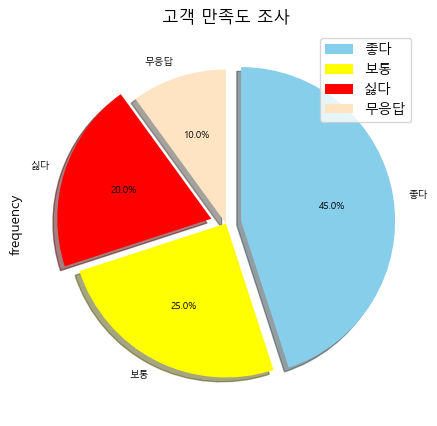

In [5]:
# 파이 차트 그리기 
survey.frequency.plot(kind='pie', # 파이 차트
                     figsize = (7,5), # figsize(가로,세로), inch
                     autopct = '%.1f%%', # autopct : %.n(소숫점 몇번째 까지)f(float)%%, 부채꼴 안에 생성될 숫자 형식)
                      startangle = 90, # 시작 각도 설정, 기본값 0도 (양의방향 x축)으로 설정
                      colors = ['skyblue','yellow','red','bisque'],
                      title = '고객 만족도 조사',
                      legend = True, # 범례 
                      fontsize = 7,
                      counterclock = False, # 시계방향 순서로 부채꼴 영역이 표시
                      explode = (0.1,0.0,0.1,0.0), # 부채꼴이 파이 차트의 중심을 벗어나는 정도
                      shadow = True) # 파이차트에 그림자 표시 


<AxesSubplot: ylabel='frequency'>

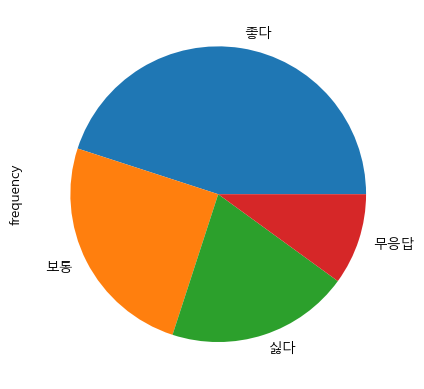

In [6]:
# 파이차트를 그리는 2번째 방법 : plot.pie 

survey.frequency.plot.pie()

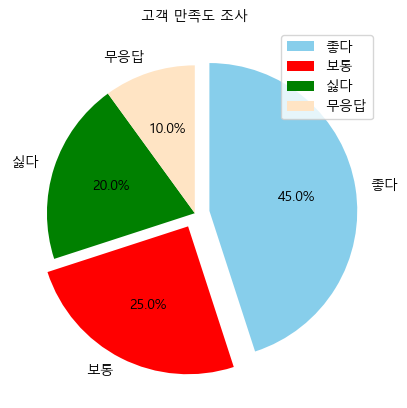

In [7]:
# pandas의 plot과 plt.pie와는 option 설정이 다르다
## 범례를 해야할 때와 안 해야할 때를 체크하기 

plt.pie(survey.frequency, labels = survey.index,
       autopct = '%.1f%%',
       startangle = 90,
       colors = ['skyblue','red','green','bisque'],
       counterclock = False,
       explode = (0.1,0.1,0,0),
       shadow = False)
plt.title('고객 만족도 조사', size = 10)
plt.legend(labels = survey.index, loc='upper right')

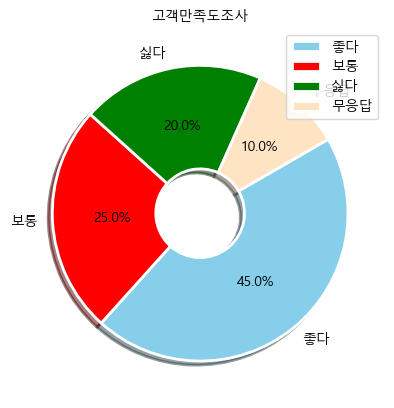

In [8]:
# 파이차트를 그리는 방법 3 : 도넛 차트 

plt.pie(survey.frequency,labels = survey.index,
        autopct = '%.1f%%', # %.n(소숫점 몇번째 까지)f(float)%%, 부채꼴안에 표시될 숫자 형식
        startangle=30,
        colors = ['skyblue','red','green','bisque'],
        counterclock = False, #시계방향 순서로 부채꼴 영역이 표시
        shadow = True, # 파이차트에 그림자 표시
        wedgeprops={'width':0.7,'edgecolor':'w','linewidth':2} # 중앙에 들어올 구멍과 선의 색, 굵기
        )

plt.title('고객만족도조사',size = 10)
plt.legend(labels = survey.index, loc = 'upper right')

## bar.chart 
- 각 범주에서 도수의 크기를 막대로 표현하는 그래프

In [9]:
x = [1,2,3]
y = [90, 79, 65]

x,y

([1, 2, 3], [90, 79, 65])

([<matplotlib.axis.XTick at 0x2a4eeea9220>,
 [Text(1, 0, 'SQL'), Text(2, 0, 'R'), Text(3, 0, 'PYTHON')])

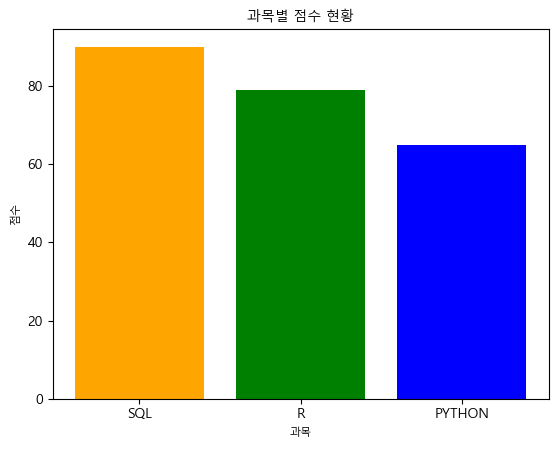

In [10]:
plt.bar(x = x, height = y, color = ['orange','green','blue'])
plt.title("과목별 점수 현황", size = 10)
plt.xlabel("과목", size = 8)
plt.ylabel("점수", size = 8)
plt.xticks(x, ['SQL','R','PYTHON']) # xticks(x, [~,~,~])을 통해 이름을 지정해 줄 수 있다.

### [문제 126] 부서별 입사 인원수를 시각화 해주세요. 단 소속부서가 없는 인원수도 출력해주세요.

pie_chart

In [43]:
# solution 1 : groupby 

x = emp.HIRE_DATE.groupby(emp.DEPARTMENT_ID.fillna(777)).count()
x = DataFrame(x)
x.reset_index(inplace = True)
x.columns = ['부서','도수']
x['부서'] = x['부서'].astype('int')
x['상대도수'] = x['도수']/x['도수'].sum()
x.loc[x['부서'] == 777, '부서'] = '부서없음'
x

,부서,도수,상대도수
0,10,1,0.009346
1,20,2,0.018692
2,30,6,0.056075
3,40,1,0.009346
4,50,45,0.420561
5,60,5,0.046729
6,70,1,0.009346
7,80,34,0.317757
8,90,3,0.028037
9,100,6,0.056075


Text(0.5, 1.0, '부서별 입사 현황')

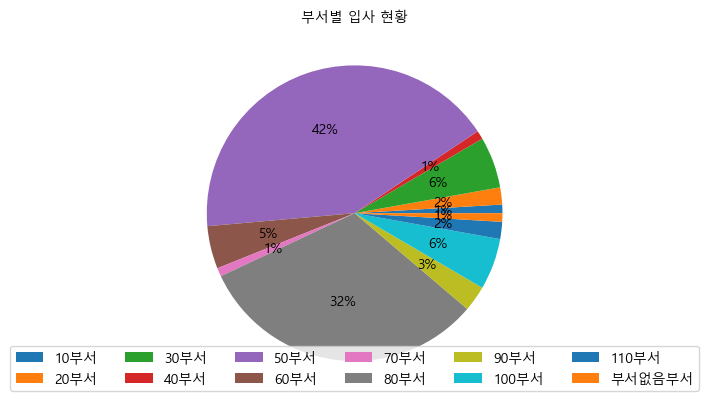

In [44]:
plt.pie(x['도수'], autopct = '%1.0f%%')
plt.legend(labels = [str(i) + "부서" for i in x['부서']], loc = 'lower center', ncol = 6)
plt.title('부서별 입사 현황', fontsize = 10)

In [46]:
# solution 2 ; collections.Counter 

import collections
from operator import itemgetter

x = collections.Counter(emp['DEPARTMENT_ID'].fillna(777)) # sort가 자동적으로 일어나지 않음 
x.keys(), x.values()

(dict_keys([90.0, 60.0, 100.0, 30.0, 50.0, 80.0, 777.0, 10.0, 20.0, 40.0, 70.0, 110.0]),
 dict_values([3, 5, 6, 6, 45, 34, 1, 1, 2, 1, 1, 2]))

In [47]:
x_sorted = sorted(x.items(), reverse = False, key = itemgetter(0))
x_sorted

[(10.0, 1),
 (20.0, 2),
 (30.0, 6),
 (40.0, 1),
 (50.0, 45),
 (60.0, 5),
 (70.0, 1),
 (80.0, 34),
 (90.0, 3),
 (100.0, 6),
 (110.0, 2),
 (777.0, 1)]

In [48]:
x = DataFrame(x_sorted)
x.columns = ['부서','인원수']
x['부서'] = x['부서'].astype('int')
x['상대도수'] = x['부서']/x['부서']. sum()
x.loc[x['부서'] == 777, '부서'] = '부서없음'
x

,부서,인원수,상대도수
0,10,1,0.006959
1,20,2,0.013918
2,30,6,0.020877
3,40,1,0.027836
4,50,45,0.034795
5,60,5,0.041754
6,70,1,0.048713
7,80,34,0.055672
8,90,3,0.062630
9,100,6,0.069589


Text(0.5, 1.0, '부서별 입사 현황')

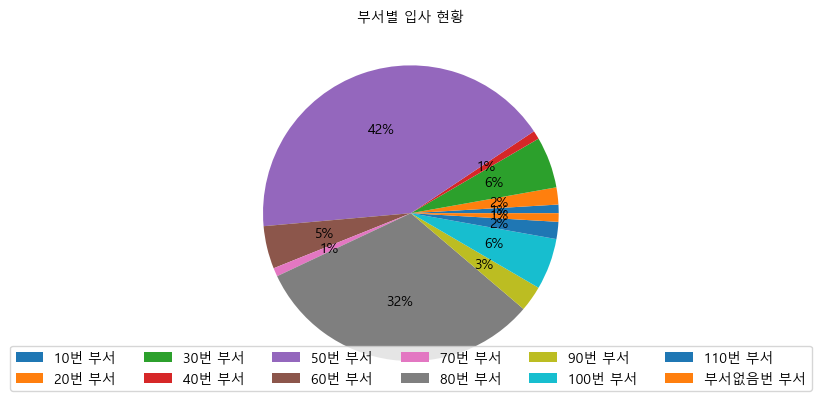

In [49]:
plt.pie(x['인원수'], autopct = '%1.0f%%')
plt.legend(labels = [str(i) + '번 부서' for i in x['부서']], loc = 'lower center', ncol = 6)
plt.title('부서별 입사 현황', fontsize = 10)

In [50]:
# solution 3 : value_count()

dept_cnt = emp.DEPARTMENT_ID.fillna(777).value_counts()
dept_cnt.sort_index(inplace = True)
dept_cnt = DataFrame(dept_cnt)
dept_cnt.reset_index(inplace = True)
dept_cnt.columns = ['부서','도수']
dept_cnt['부서'] = dept_cnt['부서'].astype('int')
dept_cnt['상대도수'] = dept_cnt['도수']/dept_cnt['도수'].sum()
dept_cnt.loc[dept_cnt['부서'] == 777, '부서'] = '부서없음'
dept_cnt

,부서,도수,상대도수
0,10,1,0.009346
1,20,2,0.018692
2,30,6,0.056075
3,40,1,0.009346
4,50,45,0.420561
5,60,5,0.046729
6,70,1,0.009346
7,80,34,0.317757
8,90,3,0.028037
9,100,6,0.056075


Text(0.5, 1.0, '부서별 입사 현황')

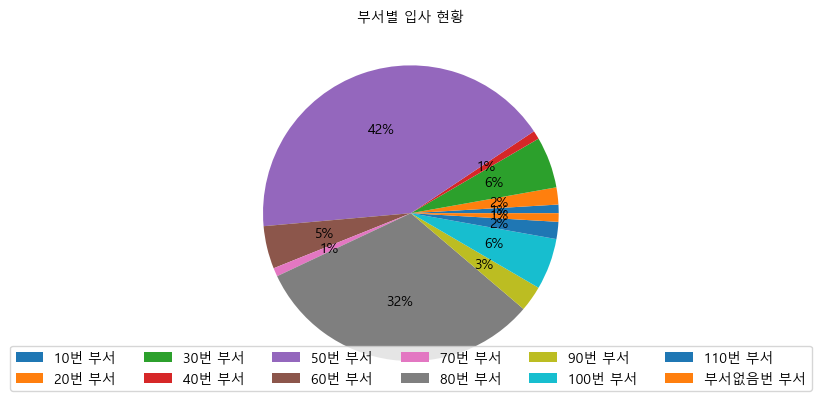

In [51]:
plt.pie(dept_cnt['상대도수'], autopct = '%1.0f%%' )
plt.legend(labels = [str(i) + "번 부서" for i in dept_cnt['부서']],loc = 'lower center', ncol = 6)
plt.title("부서별 입사 현황", fontsize = 10 )

2. bar cart

In [52]:
# solution 1 : np.unique()

dept_cnt = DataFrame(np.unique(emp['DEPARTMENT_ID'].fillna(777),return_counts = True)).transpose().astype('int')
dept_cnt

,0,1
0,10,1
1,20,2
2,30,6
3,40,1
4,50,45
5,60,5
6,70,1
7,80,34
8,90,3
9,100,6


In [59]:
# solution 2 : value_counts()

dept_cnt = emp['DEPARTMENT_ID'].fillna(777).value_counts()
dept_cnt.sort_index(inplace = True)
dept_cnt = dept_cnt.reset_index() # index 생성
dept_cnt.columns = ['부서','도수']
dept_cnt['부서'] = dept_cnt['부서'].astype('int')
dept_cnt.loc[dept_cnt['부서']==777,'부서'] = '부서 없음'
dept_cnt.info() # na값 수정 과정에서 object로 값이 변환됨 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   부서      12 non-null     object
 1   도수      12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [60]:
dept_cnt

,부서,도수
0,10,1
1,20,2
2,30,6
3,40,1
4,50,45
5,60,5
6,70,1
7,80,34
8,90,3
9,100,6


([<matplotlib.axis.XTick at 0x2a4f315aaf0>,
 [Text(0, 0, '10'),
  Text(1, 0, '20'),
  Text(2, 0, '30'),
  Text(3, 0, '40'),
  Text(4, 0, '50'),
  Text(5, 0, '60'),
  Text(6, 0, '70'),
  Text(7, 0, '80'),
  Text(8, 0, '90'),
  Text(9, 0, '100'),
  Text(10, 0, '110'),
  Text(11, 0, '부서 없음')])

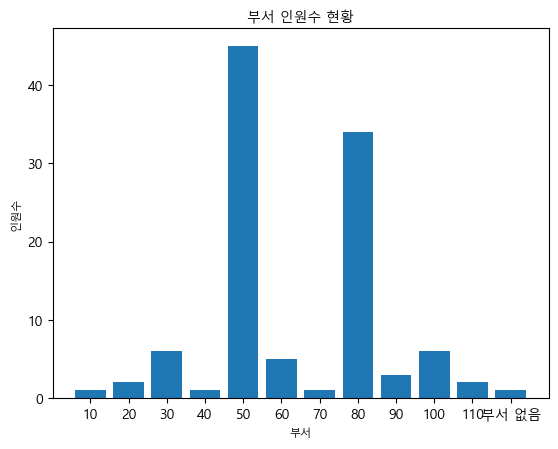

In [61]:
# 수직형 막대 그래프

plt.bar(dept_cnt.index, dept_cnt.도수)
plt.title('부서 인원수 현황', size = 10)
plt.xlabel('부서',size = 8 )
plt.ylabel('인원수',size = 8)
plt.xticks(dept_cnt.index, dept_cnt.부서)

([<matplotlib.axis.XTick at 0x2a4f34e1640>,
 [Text(0, 0, '10'),
  Text(1, 0, '20'),
  Text(2, 0, '30'),
  Text(3, 0, '40'),
  Text(4, 0, '50'),
  Text(5, 0, '60'),
  Text(6, 0, '70'),
  Text(7, 0, '80'),
  Text(8, 0, '90'),
  Text(9, 0, '100'),
  Text(10, 0, '110'),
  Text(11, 0, '부서 없음')])

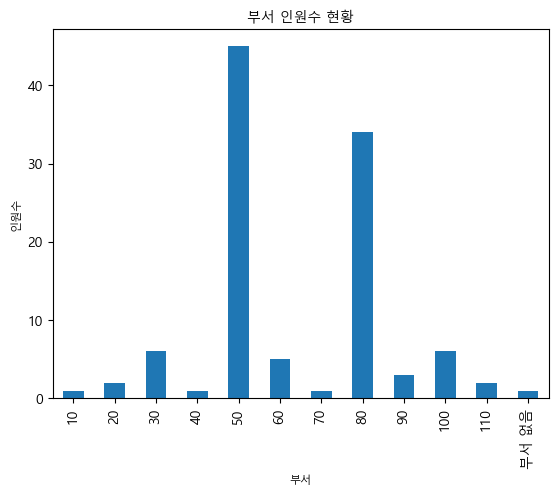

In [62]:
dept_cnt.도수.plot(kind = 'bar')
plt.title('부서 인원수 현황',size = 10)
plt.xlabel ('부서',size=8)
plt.ylabel('인원수',size=8)
plt.xticks(dept_cnt.index,dept_cnt.부서)

Text(0, 0.5, '부서')

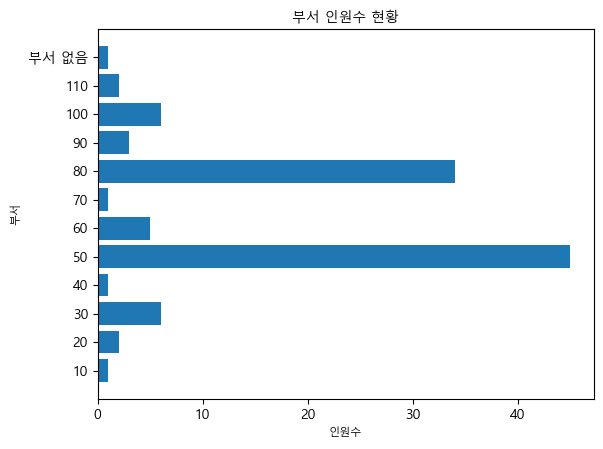

In [67]:
# 수평 막대그래프

plt.barh(y = dept_cnt.index,width = dept_cnt.도수)
plt.yticks(dept_cnt.index,dept_cnt.부서)
plt.title('부서 인원수 현황',size =10)
plt.xlabel('인원수',size = 8)
plt.ylabel('부서',size=8)

Text(0, 0.5, '부서')

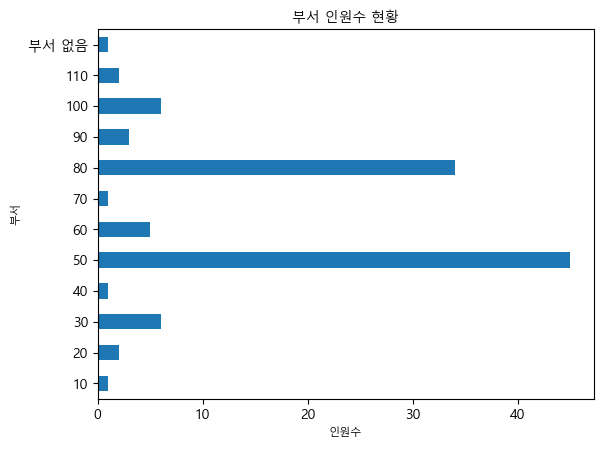

In [64]:
dept_cnt.도수.plot(kind='barh')
plt.yticks(dept_cnt.index,dept_cnt.부서)
plt.title('부서 인원수 현황',size =10)
plt.xlabel('인원수',size = 8)
plt.ylabel('부서',size=8)

pd.crosstab() 
- 빈도수 구하는 함수
- 빈도 값이 저장되는 컬럼을 꼭 지정해 줘야 한다.

<AxesSubplot: ylabel='DEPARTMENT_ID'>

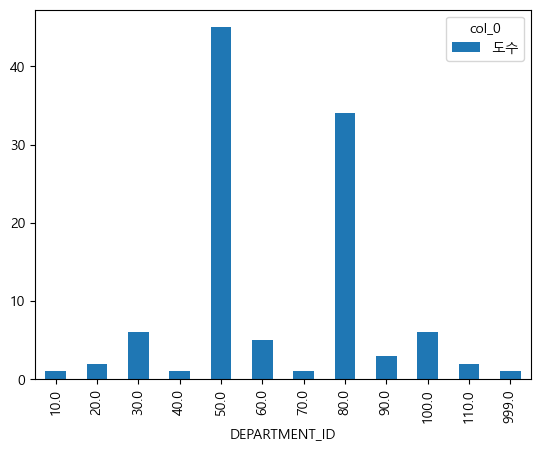

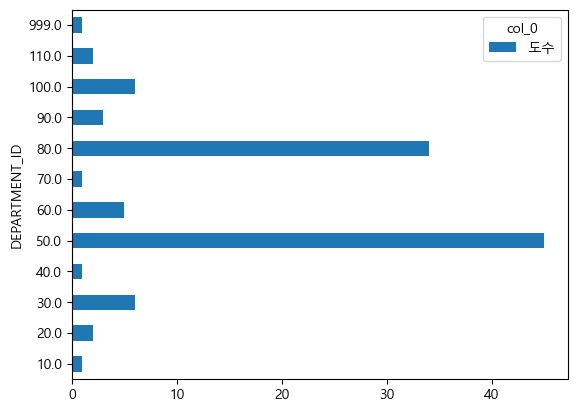

In [97]:
x_cross = pd.crosstab(emp.DEPARTMENT_ID.fillna(999), columns = '도수')

x_cross.plot(kind = 'bar')
x_cross.plot(kind = 'barh')

**그룹형 막대 그래프**

In [98]:
data = {'홍길동':[15,13,11],
        '제임스':[13,14,15],
        '하든':[10,9,12]}

In [101]:
df = DataFrame(data,index=[2018,2019,2020])
df

,홍길동,제임스,하든
2018,15,13,10
2019,13,14,9
2020,11,15,12


<AxesSubplot: >

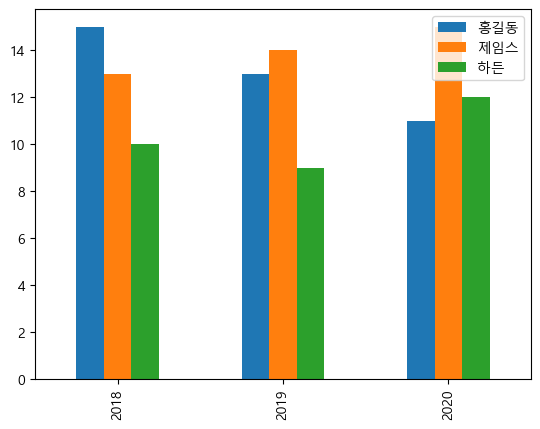

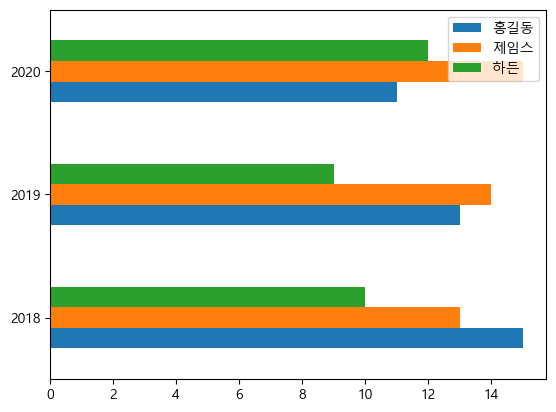

In [102]:
# 그룹형 막대그래프
df.plot(kind = 'bar')
df.plot(kind = 'barh')

<AxesSubplot: >

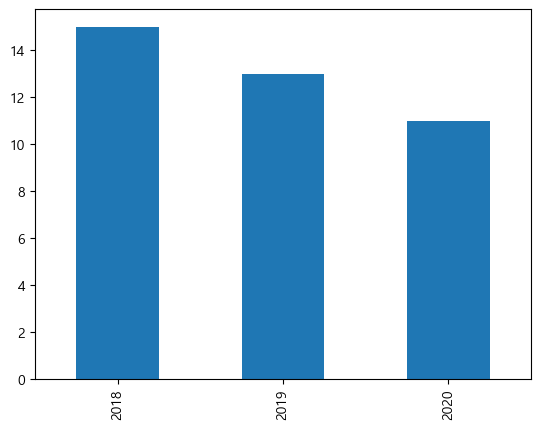

In [105]:
# 특정 컬럼만 떼어오기도 가능하다.

df.홍길동.plot(kind='bar')

<AxesSubplot: >

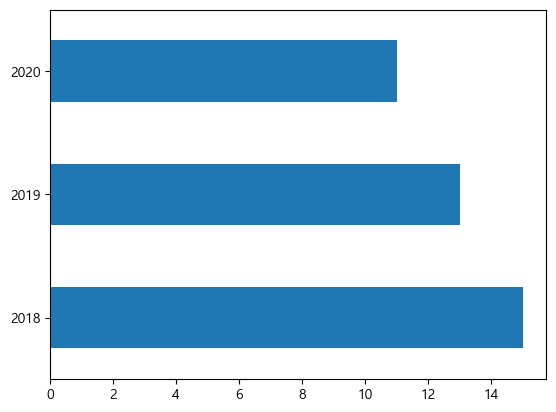

In [106]:
df.홍길동.plot(kind='barh')

<AxesSubplot: >

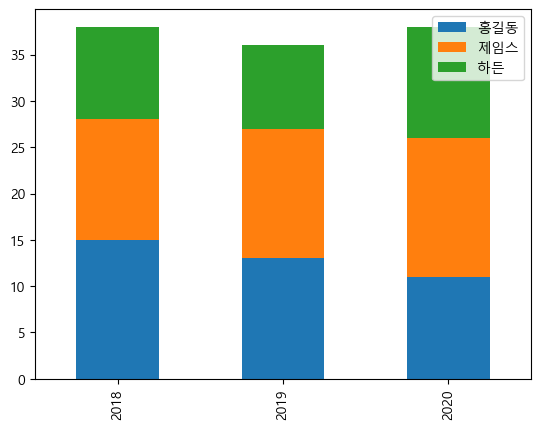

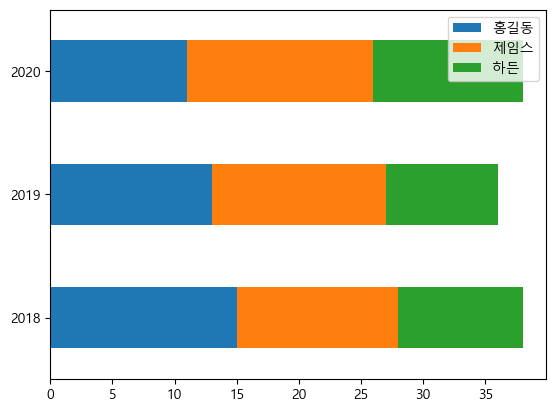

In [107]:
# 스택형 막대그래프
df.plot(kind='bar',stacked=True)
df.plot(kind='barh',stacked=True)

### [문제 127] fruits_sales.csv의 데이터를 이용해서 과일의 년도별 수량을 막대그래프로 시각화 해주세요

In [109]:
sales = pd.read_csv("c:/data/fruits_sales.csv")
sales.head(5)

,year,name,qty,price
0,2014,apple,6,16000
1,2014,banana,2,10000
2,2014,orange,7,35000
3,2014,berry,9,9000
4,2015,apple,10,10000


In [112]:
# solution 1 : group by 

sales_df = sales.groupby(['year','name'])['qty'].sum().unstack()
sales_df

name,apple,banana,berry,orange
year,,,,
2014,6,2,9,7
2015,10,7,15,3
2016,13,10,11,5
2017,15,12,17,6


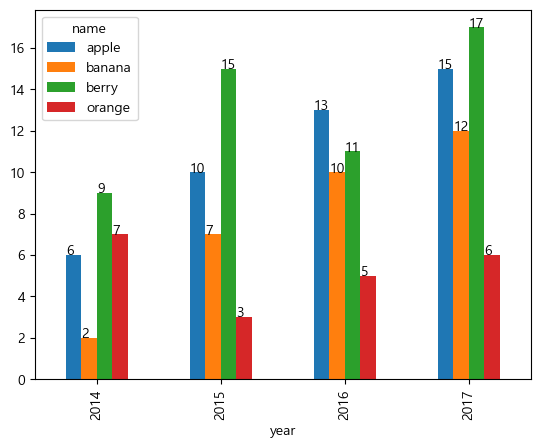

In [119]:
# 막대 그래프 위에 qty 쓰기 
ax = sales_df.plot(kind = 'bar')

for i in ax.patches:
    left,bottom,width,height = i.get_bbox().bounds
    plt.text(left,height,int(height))

<AxesSubplot: ylabel='year'>

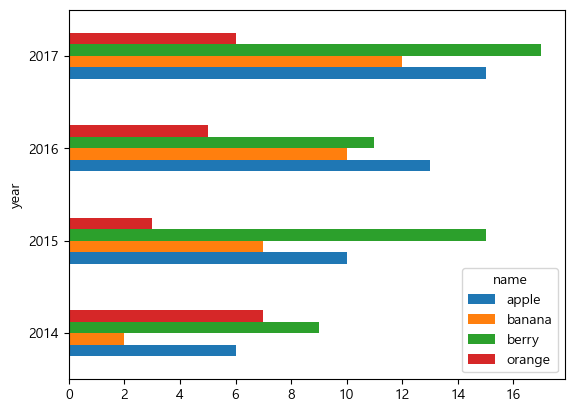

In [114]:
sales_df.plot(kind='barh')

<AxesSubplot: xlabel='year'>

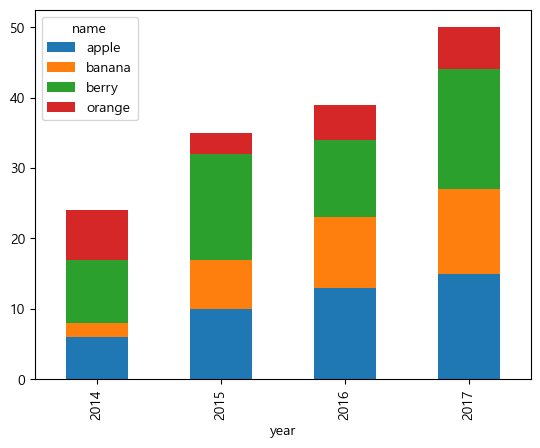

In [115]:
sales_df.plot(kind='bar',stacked=True)

<AxesSubplot: ylabel='year'>

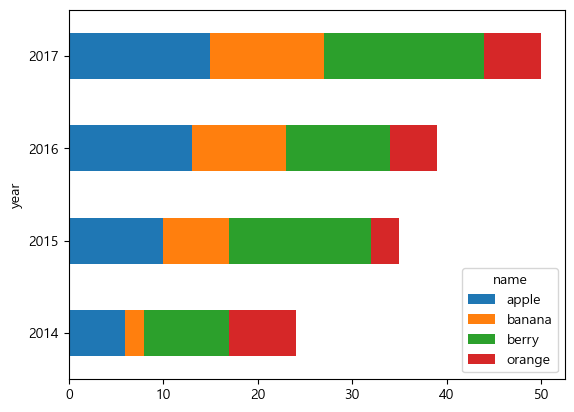

In [117]:
sales_df.plot(kind='barh',stacked=True)

solution 2 : pd.pivot_table 

In [120]:
sales_df = pd.pivot_table(data = sales,
                         index = 'year',
                         columns = 'name',
                         values = 'qty',
                         aggfunc = 'sum')

sales_df

name,apple,banana,berry,orange
year,,,,
2014,6,2,9,7
2015,10,7,15,3
2016,13,10,11,5
2017,15,12,17,6


<AxesSubplot: ylabel='year'>

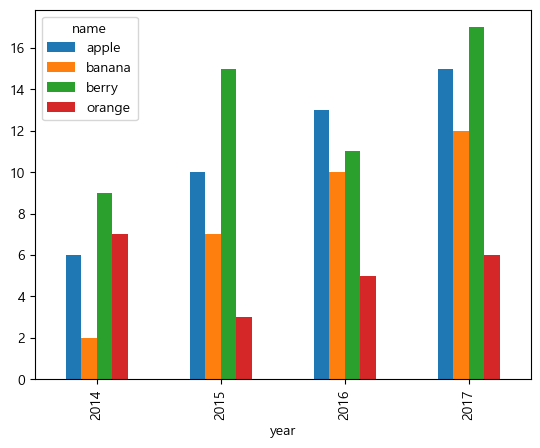

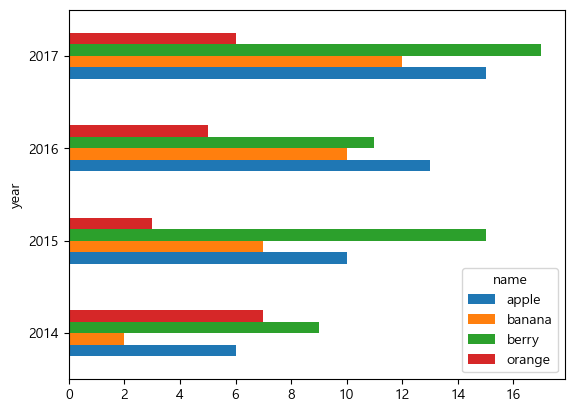

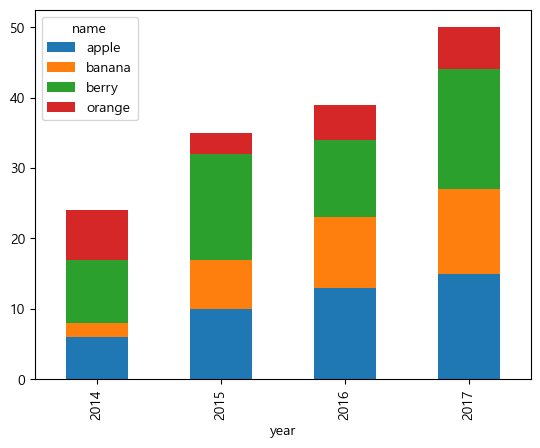

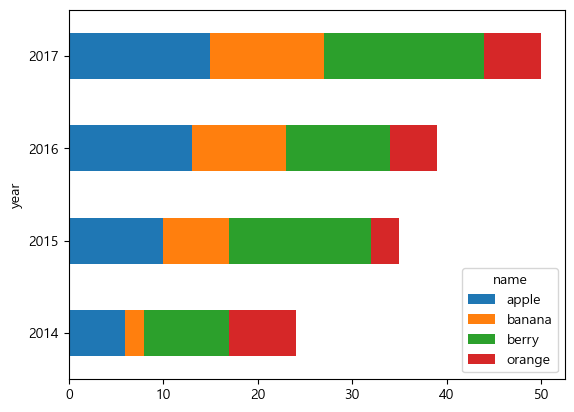

In [121]:
sales_df.plot(kind='bar')
sales_df.plot(kind='barh')

sales_df.plot(kind='bar',stacked=True)
sales_df.plot(kind='barh',stacked=True)

막대 상단에 점수(text)를 찍고 싶을 때 plt.text()

ex : plt.text(3, 80, '오늘 하루도 행복하자') # (x축의 위치, text 찍으려는 위치, 입력하려는 text) 


va : verticalalignment : y축에서의 위치
['center'|'top'|'bottom'|'baseline'|'center_baseline']

ha : horizontalalignment : x 축에서의 위치
['center'|'right'|'left]' 

In [122]:
x = [1,2,3]
y = [90,79,65]

Text(3, 75, '오늘 하루도 행복하자!')

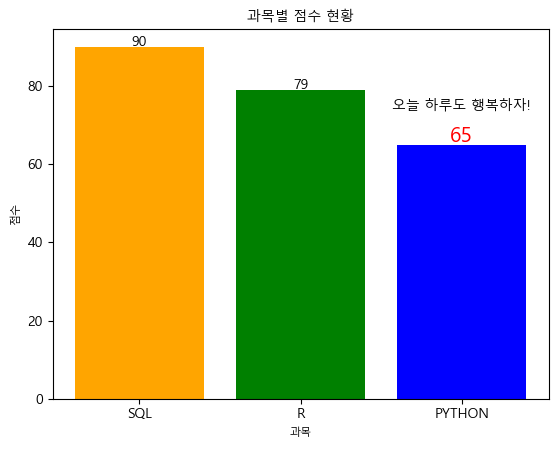

In [129]:
plt.bar(x = x, height = y, color = ['orange','green','blue'])
plt.title("과목별 점수 현황", size = 10)
plt.xlabel("과목", size = 8)
plt.ylabel("점수", size = 8)
plt.xticks(x, ['SQL','R','PYTHON']) # x축의 이름을 변경함

plt.text(1,91,90, va = 'center', ha = 'center') # x축의 위치 , text를 찍으려는 위치 , 입력하려는 text 
plt.text(2,80,79, va = 'center', ha = 'center')
plt.text(3,67,65,fontsize = 15, color='r',ha='center',va='center')
plt.text(3,75,'오늘 하루도 행복하자!',va='center',ha='center')

### [문제128] 요일별 입사인원수를 막대그래프로 시각화해주세요. 막대그래프 위에 빈도수도 출력해주세요.


In [143]:
# solution 1 : value_counts()

week = pd.to_datetime(emp.HIRE_DATE).dt.weekday.value_counts()
week.sort_values(inplace = True)
week.index = ['월','화','수','목','금','토','일']
week = pd.DataFrame(week)
week.reset_index(inplace = True)
week.columns = ['요일','입사인원수']

week

,요일,입사인원수
0,월,10
1,화,13
2,수,15
3,목,15
4,금,16
5,토,19
6,일,19


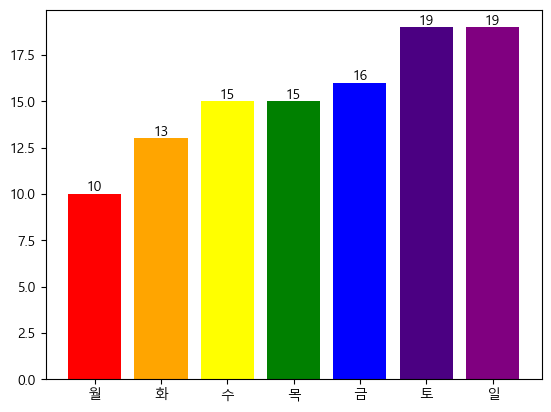

In [146]:
plt.bar(week.요일, week.입사인원수, color=['red','orange','yellow','green','blue','indigo','purple'])

for i in week.index:
    plt.text(i,week.입사인원수[i],week.입사인원수[i],ha='center',va='bottom')  # (x축의 위치, text 찍으려는 위치, 입력하려는 text)

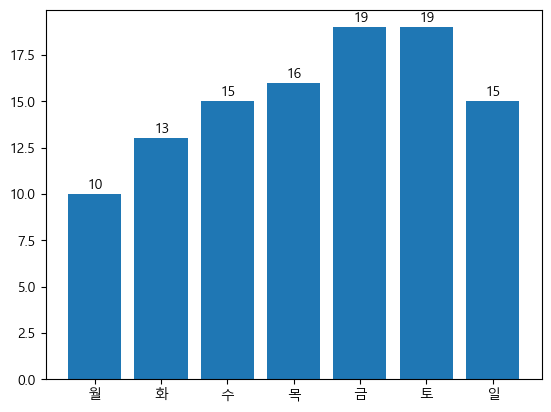

In [161]:
# solution 2 : groupby 

week = emp.HIRE_DATE.groupby(pd.to_datetime(emp.HIRE_DATE).dt.weekday).count()
week

plt.bar(week.index,week)
plt.xticks(week.index,['월','화','수','목','금','토','일'])
for i in week.index:
    plt.text(i-0.1,week[i]+0.3,week[i]) # text를 for문으로도 가능하구나..!, 근데 굳이 이렇게 하나씩 빼는 것 보단 va,ha를 사용하는게 더 나을 것 같음 

(-0.4, 0.0, 0.8, 10.0)
(0.6, 0.0, 0.7999999999999999, 13.0)
(1.6, 0.0, 0.8000000000000003, 15.0)
(2.6, 0.0, 0.8000000000000003, 16.0)
(3.6, 0.0, 0.8000000000000003, 19.0)
(4.6, 0.0, 0.7999999999999998, 19.0)
(5.6, 0.0, 0.7999999999999998, 15.0)


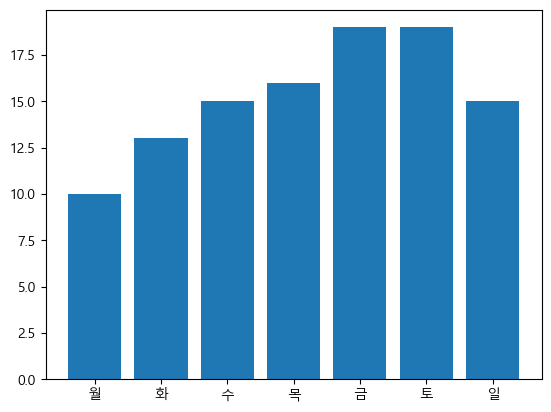

In [164]:
# 너비와 높이를 확인하는 method:patches           

ax = plt.bar(week.index, week)
plt.xticks(week.index, ['월','화','수','목','금','토','일'])

# get_bbox : 깔끔하게 확인 가능 
for i in ax.patches:
    print(i.get_bbox().bounds)

(-0.4, 0.0, 0.8, 10.0)
(0.6, 0.0, 0.7999999999999999, 13.0)
(1.6, 0.0, 0.8000000000000003, 15.0)
(2.6, 0.0, 0.8000000000000003, 16.0)
(3.6, 0.0, 0.8000000000000003, 19.0)
(4.6, 0.0, 0.7999999999999998, 19.0)
(5.6, 0.0, 0.7999999999999998, 15.0)


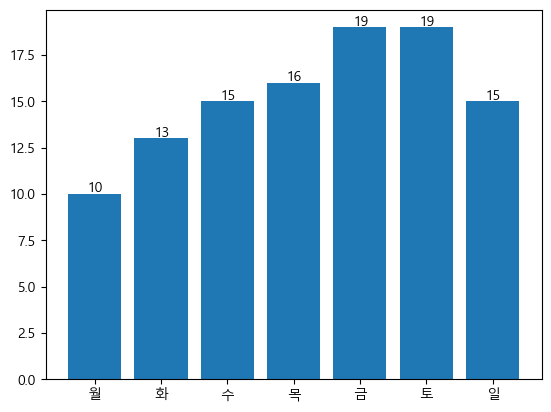

In [165]:
## 그룹형 막대 그래프에 사용할 때 쓰면 좋을 것 같음 

ax = plt.bar(week.index, week)
plt.xticks(week.index, ['월','화','수','목','금','토','일'])

for i in ax.patches:
    left, bottom, width, height = i.get_bbox().bounds
    plt.text(left+0.3, height+0.1, int(height))

for i in ax.patches:
    print(i.get_bbox().bounds)

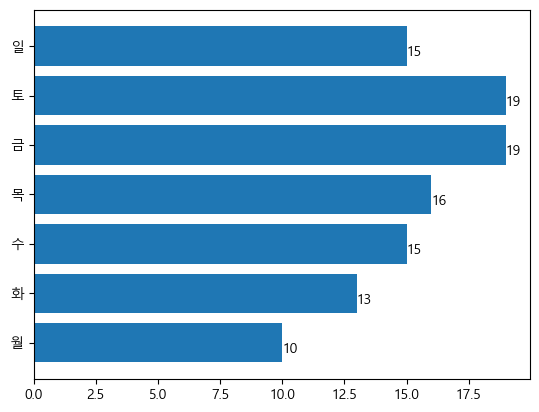

In [167]:
#  수평 막대 그래프에 찍기
# width(폭, 너비)가 x가 됨 

ax = plt.barh(week.index,week)
plt.yticks(week.index,['월','화','수','목','금','토','일'])

for i in ax.patches:
    left, bottom, width, height = i.get_bbox().bounds
    
    plt.text(width, bottom+0.2, int(width))

# 문제풀이

## [문제 123]blood.csv 파일을 읽어 들여서 도수분포표를 작성하시고 pie chart도 생성해주세요 


In [14]:
# 라이브러리 불러오기
import pandas as pd 

blood = pd.read_csv("c:/data/blood.csv")
blood

,NAME,GENDER,BLOODTYPE
0,Emily,F,A
1,Jacob,M,O
2,Michael,M,B
3,Matthew,M,AB
4,Madison,F,B
5,Hannah,F,A
6,Daniel,M,A
7,William,M,O
8,Ashley,F,O
9,Alexis,F,B


In [15]:
# 도수 분포표 만들기 
x = blood.BLOODTYPE.value_counts()
ft = DataFrame({'도수': x,
               '상대도수' : x/x.sum()})
ft

,도수,상대도수
A,7,0.35
O,6,0.30
AB,4,0.20
B,3,0.15


In [16]:
ft.index

Index(['A', 'O', 'AB', 'B'], dtype='object')

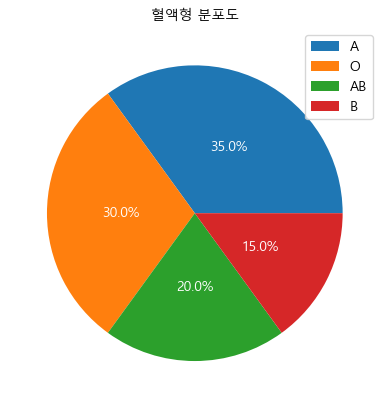

In [17]:
plt.pie(ft.도수, labels = ft.index,
        autopct = '%.1f%%',
        pctdistance = 0.5, # 퍼센트를 표시할 위치, 중앙에서의 거리이며 기본값 0.6
        textprops = dict(size = 10, rotation = 0, color = 'white')) # 레이블의 텍스트 속성 설정
plt.title('혈액형 분포도',size = 10)
plt.legend(labels = ft.index, loc = 'upper right')

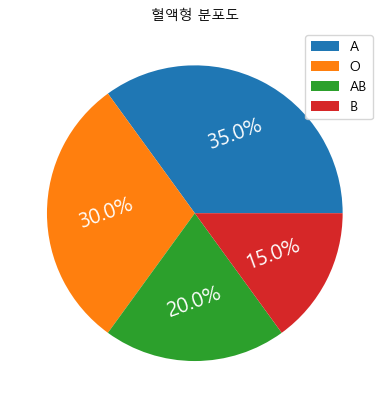

In [18]:
# 혹은 textprop 변수를 따로 생성해서 사용도 가능하다 

textprop = dict(size=15,rotation=20,color='white')

plt.pie(ft.도수, 
        autopct = '%.1f%%',
        pctdistance = 0.6, # 퍼센트를 표시할 위치, 중앙에서의 거리이며 기본값 0.6
        textprops = textprop) 
plt.title('혈액형 분포도',size = 10)
plt.legend(labels = ft.index, loc = 'upper right')

## [문제 124] 요일별 입사 인원수에 대해서 도수분포표를 작성하시고, pie chart도 생성해주세요 


In [19]:
emp = pd.read_csv("c:/data/emp.csv")
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EMPLOYEE_ID     107 non-null    int64  
 1   FIRST_NAME      107 non-null    object 
 2   LAST_NAME       107 non-null    object 
 3   EMAIL           107 non-null    object 
 4   PHONE_NUMBER    107 non-null    object 
 5   HIRE_DATE       107 non-null    object 
 6   JOB_ID          107 non-null    object 
 7   SALARY          107 non-null    int64  
 8   COMMISSION_PCT  35 non-null     float64
 9   MANAGER_ID      106 non-null    float64
 10  DEPARTMENT_ID   106 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 9.3+ KB


In [20]:
# 요일별로 나누기 위해 datetime 적용하기
week = emp.EMPLOYEE_ID.groupby(pd.to_datetime(emp.HIRE_DATE).dt.weekday).count()
week

HIRE_DATE
0    10
1    13
2    15
3    16
4    19
5    19
6    15
Name: EMPLOYEE_ID, dtype: int64

In [21]:
# index에 설명 부여기 
week.index=['월','화','수','목','금','토','일']

In [22]:
# 데이터 프레임으로 변형

week = DataFrame(week)
week

,EMPLOYEE_ID
월,10
화,13
수,15
목,16
금,19
토,19
일,15


In [23]:
week.columns = ['요일','도수']
week

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [ ]:
week['상대도수'] = round(week['도수']/week['도수'].sum(),2)
week

In [ ]:
# pie chart 그리기

plt.pie(week.도수,
        autopct = '%1.1f%%')
plt.legend(labels = week.요일, loc = 'lower center', ncol =7) # ncol: 범례를 가로방향으로 출력할 때

In [24]:
# soltuion 2 : collections.Counter 

## 필요한 라이브러리 불러오기 
import collections
import datetime 
from operator import itemgetter

In [25]:
week = collections.Counter(pd.to_datetime(emp.HIRE_DATE).dt.weekday)
week.keys(), week.values()

(dict_keys([1, 2, 5, 0, 6, 4, 3]), dict_values([13, 15, 19, 10, 15, 19, 16]))

In [26]:
week_sorted =sorted(week.items(),reverse=False,key=itemgetter(0)) #key 기준 정렬/ itemgetter(1)하면 values 기준으로 정렬
week = DataFrame(week_sorted)
week

,0,1
0,0,10
1,1,13
2,2,15
3,3,16
4,4,19
5,5,19
6,6,15


In [27]:
# 값변경해서 월~일 나타내기 
week[0] = ['월','화','수','목','금','토','일']
week

,0,1
0,월,10
1,화,13
2,수,15
3,목,16
4,금,19
5,토,19
6,일,15


In [28]:
# 컬럼명 변경하기 
week.columns = ['요일','도수']
week

,요일,도수
0,월,10
1,화,13
2,수,15
3,목,16
4,금,19
5,토,19
6,일,15


In [29]:
week['상대도수'] = week.도수/week.도수.sum()
week

,요일,도수,상대도수
0,월,10,0.093458
1,화,13,0.121495
2,수,15,0.140187
3,목,16,0.149533
4,금,19,0.177570
5,토,19,0.177570
6,일,15,0.140187


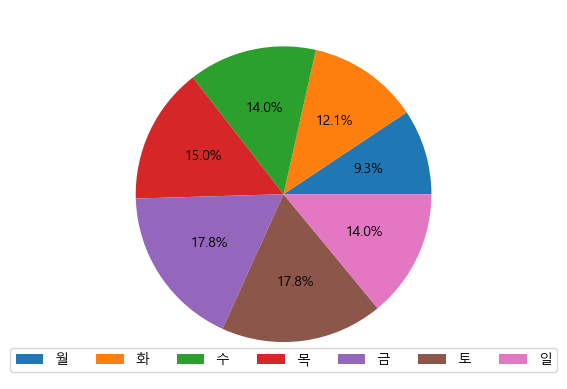

In [30]:
plt.pie(week.도수, autopct = '%1.1f%%')
plt.legend(labels = week.요일, loc = 'lower center', ncol = 7)

## [문제 125] 분기별 입사 인원수에 대해서 도수분포표를 생성하시고, pie chart도 생성해주세요

In [31]:
# solution 1 : groupby 

quarter = emp.EMPLOYEE_ID.groupby(pd.to_datetime(emp.HIRE_DATE).dt.quarter).sum()
quarter = DataFrame(quarter)
quarter.reset_index(inplace = True)
quarter.columns = ['분기','도수']
quarter['상대도수'] = round(quarter.도수/quarter.도수.sum(),2)
quarter

,분기,도수,상대도수
0,1,6962,0.43
1,2,3906,0.24
2,3,2975,0.18
3,4,2528,0.15


Text(0.5, 1.0, '분기별 입사 현황')

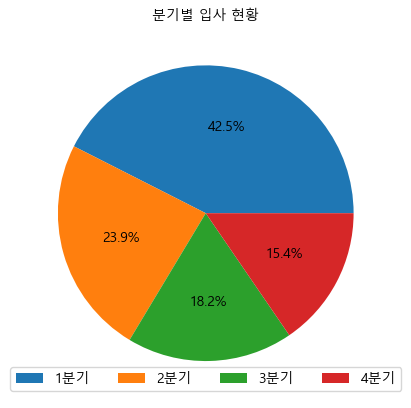

In [32]:
plt.pie(quarter.도수,
       autopct = '%1.1f%%')
plt.legend(labels = [str(i)+'분기' for i in quarter.분기], loc = 'lower center', ncol = 4)
plt.title('분기별 입사 현황',fontsize = 10)

In [33]:
# solution 2 : collections.Counter 

In [34]:
import collections
from operator import itemgetter 

quarter = collections.Counter(pd.to_datetime(emp.HIRE_DATE).dt.quarter)
quarter_sorted = sorted(quarter.items(), reverse = False, key = itemgetter(0))
quarter = DataFrame(quarter_sorted)
quarter.columns = ['분기','인원수']
quarter.분기 = ['1분기','2분기','3분기','4분기']
quarter['상대도수'] = round(quarter.인원수/quarter.인원수.sum(),2)
quarter

,분기,인원수,상대도수
0,1분기,44,0.41
1,2분기,24,0.22
2,3분기,21,0.20
3,4분기,18,0.17


Text(0.5, 1.0, '분기별 입사 현황')

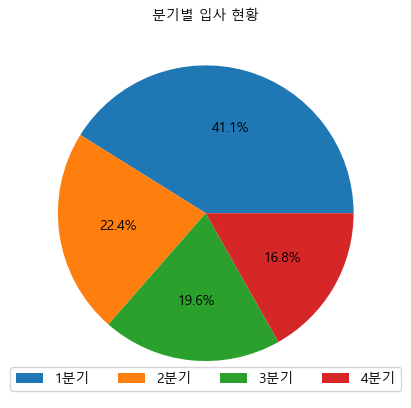

In [35]:
plt.pie(quarter.인원수,autopct='%1.1f%%')
plt.legend(labels = quarter.분기, loc='lower center', ncol = 4)
plt.title('분기별 입사 현황',fontsize = 10)

Text(0.5, 1.0, '분기별 입사 현황')

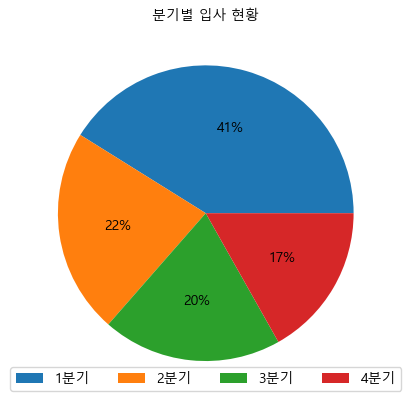

In [36]:
# solution3 : values_counts -> Series 

quarter = pd.to_datetime(emp.HIRE_DATE).dt.quarter.value_counts()
quarter = DataFrame(quarter)
quarter.sort_index(inplace = True)
quarter.index = ['1분기','2분기','3분기','4분기']
quarter.reset_index(inplace = True)
quarter.columns = ['분기','도수']
quarter['상대도수'] = quarter['도수']/quarter['도수'].sum()

plt.pie(quarter['도수'],autopct = '%1.0f%%')
plt.legend(labels = quarter['분기'], loc = 'lower center', ncol = 4)
plt.title('분기별 입사 현황', fontsize = 10)

유일값 추출의 두가지 방법 

1. pandas : . unique()
2. numpy : np.unique()

In [37]:
emp.DEPARTMENT_ID.unique()

array([ 90.,  60., 100.,  30.,  50.,  80.,  nan,  10.,  20.,  40.,  70.,
       110.])

In [38]:
np.unique(emp.DEPARTMENT_ID)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
        nan])

np.unique(return_counts = True)

유니크한 값을 뽑기 위해 sort를 시행 할 것이고
내부적으로 앞의 값과 뒤의 값을 비교하며 유니크 한 값을 찾을 것이다 (10,10,20)
이 과정에서 count가 함께 돌아가고, 빈도수를 리턴하게 되는 로직 


In [39]:
np.unique(emp.DEPARTMENT_ID, return_counts = True) # 값을 함께 카운트 해줌

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
         nan]),
 array([ 1,  2,  6,  1, 45,  5,  1, 34,  3,  6,  2,  1], dtype=int64))

In [40]:
# solution 4 : np.unique()를 이용해 도수값 만들기 
quarter = np.unique(pd.to_datetime(emp.HIRE_DATE).dt.quarter, return_counts = True)
quarter = DataFrame(quarter).transpose() #.transpose() 전치행렬화 해주기
quarter.columns = ['분기','도수']
quarter['상대도수'] = quarter['도수']/quarter['도수'].sum()
quarter

,분기,도수,상대도수
0,1,44,0.411215
1,2,24,0.224299
2,3,21,0.196262
3,4,18,0.168224


In [41]:
quarter = np.unique(pd.to_datetime(emp.HIRE_DATE).dt.quarter, return_counts = True)
quarter = DataFrame(quarter).transpose()
quarter

,0,1
0,1,44
1,2,24
2,3,21
3,4,18


In [42]:
plt.pie(quarter.도수, autopct = '%1.0f%%')
plt.legend(labels = [str(i) + "분기" for i in quarter.분기], loc = 'lower center', ncol = 4)
plt.title('분기별 입사 현황', fontsize = 10)

AttributeError: 'DataFrame' object has no attribute '도수'